# Potato Disease Classification

### Import all the Dependencies

In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

## 1. Data Loading and Preprocessing

In [ ]:
# Constants for image preprocessing
IMAGE_SIZE = 256  # Target size for all images (256x256 pixels)
CHANNELS = 3      # RGB color channels
BATCH_SIZE = 32   # Number of images to process at once

In [ ]:
# Load dataset from directory structure
# Each subdirectory represents a class (Early_blight, Late_blight, healthy)
dataset = tf.keras.preprocessing.image_dataset_from_directory(
        'PlantVillage',
        image_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,

)

In [6]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
len(dataset)

68

(256, 256, 3)


2025-10-07 10:54:54.551810: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


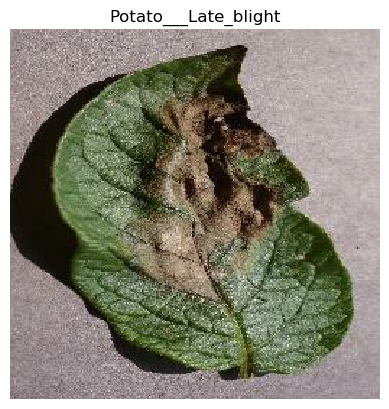

In [8]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")
    print(image_batch[0].shape)

## 2. Data Splitting (Train/Validation/Test)

In [9]:
# 80% for training 
# 20% for 10% val and 10% test

In [ ]:
# Calculate training set size (80% of total dataset)
train_size = 0.8
len(dataset)*train_size

In [ ]:
# Take first 54 batches for training (80% of 68 batches)
train_dataset = dataset.take(54)
len(train_dataset)

In [ ]:
# Skip training batches to get remaining data for validation and test
validation_test_dataset = dataset.skip(54)
len(validation_test_dataset)

In [13]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [ ]:
# Take 6 batches for validation (10% of total dataset)
val_dataset = validation_test_dataset.take(6)
len(val_dataset)

In [ ]:
# Take 6 batches for testing (10% of total dataset)
test_dataset = validation_test_dataset.skip(6).take(6)
len(test_dataset)

In [ ]:
# Optimize training dataset performance:
# - cache(): Keep data in memory after first load
# - shuffle(): Randomize order to prevent overfitting
# - prefetch(): Prepare next batch while current batch is being processed
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

## 3. Data Augmentation

In [ ]:
# Optimize validation dataset performance
val_dataset = val_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
# Optimize test dataset performance
test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
## 4. CNN Model Architecture Building

In [ ]:
# Data augmentation to increase dataset diversity and prevent overfitting:
# - RandomFlip: Flip images horizontally and vertically
# - RandomRotation: Rotate images by up to 20% (72 degrees)
data_augmentation = tf.keras.Sequential([
    
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [21]:
## Building the Model using CNN

In [ ]:
# Define model architecture
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
num_classes = 3  # Three potato disease classes

# Build CNN model with:
# - Preprocessing and augmentation layers
# - 6 convolutional blocks (Conv2D + MaxPooling)
# - Flatten layer to convert 2D features to 1D
# - Dense layers for classification
model = models.Sequential([
    resize_rescale,           # Resize and normalize images
    data_augmentation,        # Apply random transformations
    
    # Convolutional block 1: Extract basic features
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Convolutional blocks 2-6: Extract increasingly complex features
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Classification layers
    layers.Flatten(),                                    # Convert to 1D
    layers.Dense(64, activation='relu'),                 # Hidden layer
    layers.Dense(num_classes, activation='softmax'),     # Output layer with probabilities
])

model.build(input_shape=input_shape)

## 5. Model Compilation and Training

In [23]:
# pip install -U numpy==1.18.5 


## 6. Model Evaluation

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)         

In [ ]:
# Compile model with:
# - Adam optimizer for adaptive learning rate
# - Sparse categorical crossentropy for multi-class classification
# - Accuracy metric to track performance
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
## 7. Predictions

In [ ]:
# Evaluate model performance on test dataset
evaluation_results = model.evaluate(test_dataset)

In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
# Extract training history metrics for visualization
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

In [ ]:
# Plot training metrics to visualize model performance over epochs
EPOCHS = 10

plt.figure(figsize=(8, 8))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), training_accuracy, label='Training Accuracy')
plt.plot(range(EPOCHS), validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), training_loss, label='Training Loss')
plt.plot(range(EPOCHS), validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 8. Model Saving

In [40]:
### Run prediction on a sample image

In [ ]:
import numpy as np

# Test model on a single image from test dataset
for image_batch, label_batch in test_dataset.take(1):
    first_image = image_batch[0].numpy().astype("uint8")
    first_label = label_batch[0].numpy()
    
    # Display the image
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    # Get model prediction
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    

In [ ]:
def predict(model, image):
    """
    Make prediction on a single image
    
    Args:
        model: Trained Keras model
        image: Image tensor to predict
        
    Returns:
        predicted_class: Name of predicted class
        confidence: Prediction confidence as percentage
    """
    # Convert image to array and add batch dimension
    image_array = tf.keras.preprocessing.image.img_to_array(image)
    image_array = tf.expand_dims(image_array, 0)

    # Get model predictions
    predictions = model.predict(image_array)

    # Extract class name and confidence
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [48]:
# Now run inference on few sample images

In [ ]:
# Display predictions for 9 sample images in a 3x3 grid
plt.figure(figsize=(15, 15))
for images, labels in test_dataset:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        
        # Get prediction and actual class
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        # Display with actual vs predicted labels
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [ ]:
# Save trained model to disk for future use
model.save("./models/potatoes.h5")